## Task at Hand

The Fashion-MNIST dataset is a subset of the MNIST (Modified National Institute of Standards and Technology) database.

It is a dataset of 70,000 graysclae images of 10 clothing items.

Each image is a 28X28 tensor/array/matrix with pixel values between the range of 0 and 255.

In this notebook we will try to build Fully Connected Deep Neural Networks and Convolutional Neural Networks based Models and try to achieve 90%+ accuracy. Keep in mind that benchmark for Fashion MNIST is Fine-Tuning DARTS model that achieved an accuracy of 96.9% in 2020. Reference : [Fashion-MNIST Benchmarks](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)

**Reference Links:** 

[Link 1](https://colab.research.google.com/drive/1U7KniSWvUK7fniG5sqp-NYGNAyDxjX_N#scrollTo=QrIFMbP4TgrT)

[Link 2](https://colab.research.google.com/github/liady/ssp19ai/blob/master/Excercise_3_Fashion_MNIST_Classifier.ipynb#scrollTo=hQlnbqaw2Qu_&uniqifier=1)

[Link 3](https://colab.research.google.com/github/markwest1972/CNN-Example-Google-Colaboratory/blob/master/CNN_Fashion_MNIST_Example.ipynb#scrollTo=hFXEvBB9hvor)

[Link 4](https://stats.stackexchange.com/questions/296027/choosing-filter-size-strides-etc-in-a-cnn)

[Link 5](https://www.kaggle.com/code/rutvikdeshpande/fashion-mnist-cnn-beginner-98/notebook)

# Imports, Data Loading and Exploration.

In [1]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
# Install utilities through this link, or write your own functions like I did in this notebook.
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

Cloning into 'ssp19ai_utils'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.
Already up to date.


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import random

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/fashion_mnist.py'>

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
"""
    These are the clothing items in order.
    Note that the labels and images in the dataset are all numerical.
"""

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#Cmap=None prints out colored while Cmap=plt.cm.binary prints our grayscale images
def plot_random_image_grayscale():
    a = random.randrange(0, 10000, 1)
    image = train_images[a]
    title = class_names[train_labels[a]]
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def plot_random_image_heatmap():
    a = random.randrange(0, 10000, 1)
    image = train_images[a]
    title = class_names[train_labels[a]]
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=None)
    plt.colorbar()
    plt.grid(False)
    plt.show()

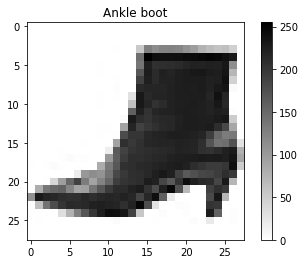

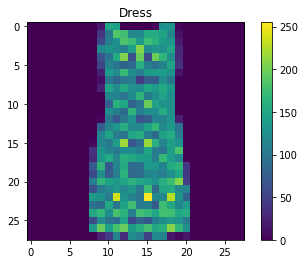

In [11]:
plot_random_image_grayscale()
plot_random_image_heatmap()

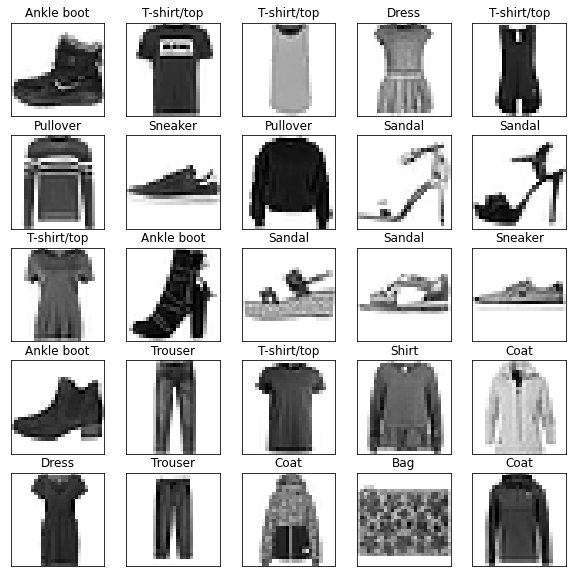

In [12]:
#Plotting 25 images at a time

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

In [13]:
"""
    Every pixel has value between the range of 0 and 255, dividing them by 255 would
    normalize the dataset and ease computation for our model, hence enhancing its
    performance
"""

train_images = train_images/255
test_images = test_images/255

In [14]:
len(class_names)

10

# Model 1

A simple fully connected neural network with an input layer of the shape *28X28*, a hidden layer of 128 neurons and an output layer of 10 neurons which must be equal the number of classes.

In [15]:
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(128, activation="ReLU"),
                               tf.keras.layers.Dense(10, activation="softmax")
])

In [16]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics= ['accuracy'])

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
history_1 = model_1.fit(train_images,
                        train_labels,
                        validation_split=0.20,
                        epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5236 - accuracy: 0.8174 - val_loss: 0.4200 - val_accuracy: 0.8548
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3883 - accuracy: 0.8609 - val_loss: 0.3730 - val_accuracy: 0.8668
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3478 - accuracy: 0.8735 - val_loss: 0.3624 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3220 - accuracy: 0.8823 - val_loss: 0.3852 - val_accuracy: 0.8563
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8876 - val_loss: 0.3426 - val_accuracy: 0.8749
CPU times: user 23.3 s, sys: 2.16 s, total: 25.5 s
Wall time: 42 s


In [19]:
model_1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8714


[0.3608885109424591, 0.871399998664856]

In [20]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8714
Test loss: 0.3608885109424591
Test accuracy: 0.871399998664856


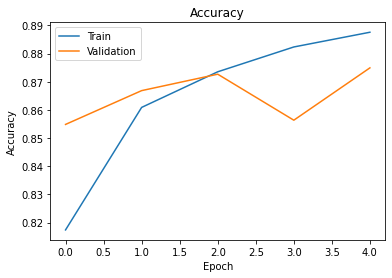

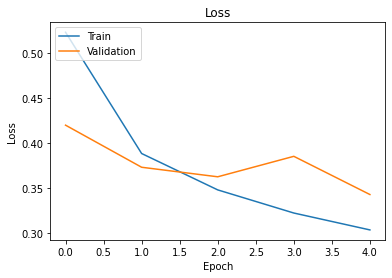

In [21]:
def plot_accuracy_and_loss(history):
  accuracy_label = 'accuracy' if 'accuracy' in history.history else 'acc'
  # Plot training & validation accuracy values
  plt.plot(history.history[accuracy_label])
  plt.plot(history.history['val_'+accuracy_label])
  plt.title('Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot_accuracy_and_loss(history_1)  

In [37]:
model_1_predictions = model_1.predict(test_images)
model_1_predictions.shape

(10000, 10)

In [38]:
#Argmax function returns the index of the highest value in an array
model_1_predictions[1].argmax()

2

In [25]:
test_labels[1]

2

In [39]:
#Predictions on 10 random images in our model
a = random.randrange(0, 9000, 1)

for i in range(a, a+10):
    print("Predicted Label: ", model_1_predictions[i].argmax(), class_names[model_1_predictions[i].argmax()])
    print("True label.....: ", test_labels[i], class_names[test_labels[i]])
    print("-----------------")

Predicted Label:  4 Coat
True label.....:  4 Coat
-----------------
Predicted Label:  3 Dress
True label.....:  3 Dress
-----------------
Predicted Label:  4 Coat
True label.....:  4 Coat
-----------------
Predicted Label:  2 Pullover
True label.....:  4 Coat
-----------------
Predicted Label:  5 Sandal
True label.....:  5 Sandal
-----------------
Predicted Label:  1 Trouser
True label.....:  1 Trouser
-----------------
Predicted Label:  3 Dress
True label.....:  0 T-shirt/top
-----------------
Predicted Label:  1 Trouser
True label.....:  1 Trouser
-----------------
Predicted Label:  2 Pullover
True label.....:  2 Pullover
-----------------
Predicted Label:  0 T-shirt/top
True label.....:  0 T-shirt/top
-----------------


In [40]:
from sklearn.utils.multiclass import unique_labels

unique = unique_labels(test_labels, model_1_predictions.argmax())

unique

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, 761])

In [41]:
def plot_single_image_correct(i, predictions, true_labels, images, class_names=None, cmap=plt.cm.binary):
  predictions_array, true_label, img = predictions[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=cmap)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  class_name = true_label if class_names is None else class_names[true_label]
  class_name_predicted = predicted_label if class_names is None else class_names[predicted_label]
  plt.xlabel("{} {:2.0f}% ({})".format(class_name_predicted,
                                100*np.max(predictions_array),
                                class_name),
                                color=color)

# plot_single_image_correct(12, predictions, test_labels, test_images)

def plot_value_array(i, predictions, true_labels):
  predictions_array, true_label = predictions[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# plot_value_array(2, predictions, test_labels)

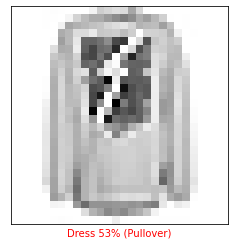

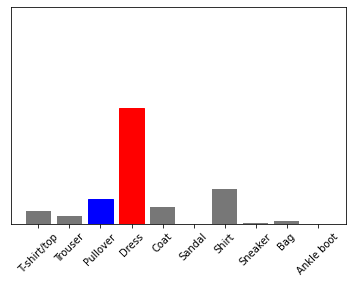

In [95]:
def plot_image_and_prob(predictions, test_labels, test_images, class_names=None, i = 0, cmap=plt.cm.binary,big=False):
  if(big == True):
    plot_single_image_correct(i, predictions, test_labels, test_images, class_names, cmap=cmap)
    plt.show()
    plot_value_array(i, predictions, test_labels)
    rng = range(len(unique_labels(test_labels)))
    clsnms = rng if class_names is None else class_names 
    plt.xticks(rng, clsnms, rotation=45)
    plt.show()
  else:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_single_image_correct(i, predictions, test_labels, test_images, class_names, cmap=cmap)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

plot_image_and_prob(model_1_predictions, test_labels, test_images, big=True, class_names=class_names, i=222)

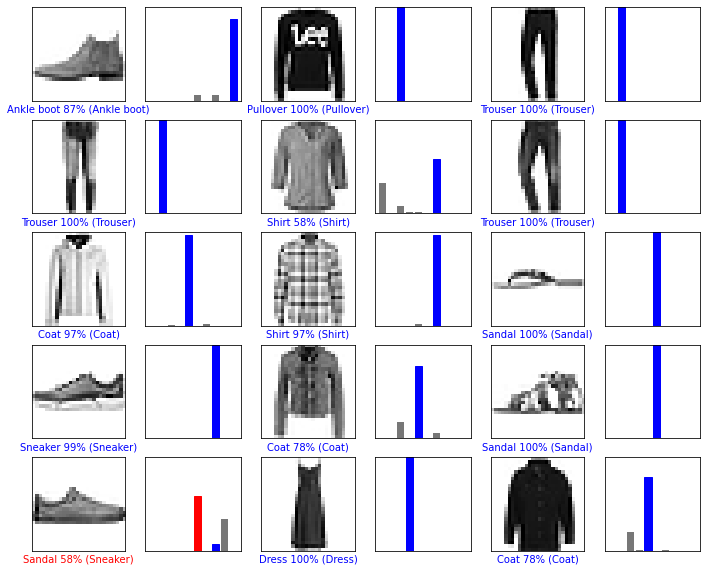

In [43]:
#Plots first 15 images
def plot_multi_images_prob(predictions, labels, images, class_names=None, start=0, num_rows=5, num_cols=3, cmap=plt.cm.binary ):
  num_rows = 5
  num_cols = 3
  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    index = i + start
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_single_image_correct(index, predictions, labels, images, class_names, cmap=cmap)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(index, predictions, labels)
  plt.show()

plot_multi_images_prob(model_1_predictions, test_labels, test_images, class_names=class_names, cmap=plt.cm.binary)

In [44]:
history_1.history

{'accuracy': [0.8173750042915344,
  0.8608750104904175,
  0.8735208511352539,
  0.8823333382606506,
  0.8875625133514404],
 'loss': [0.5236265063285828,
  0.388338178396225,
  0.34776073694229126,
  0.3219543993473053,
  0.30310937762260437],
 'val_accuracy': [0.8548333048820496,
  0.8668333292007446,
  0.8726666569709778,
  0.856333315372467,
  0.874916672706604],
 'val_loss': [0.419968843460083,
  0.37301525473594666,
  0.3623696565628052,
  0.38520723581314087,
  0.3425910174846649]}

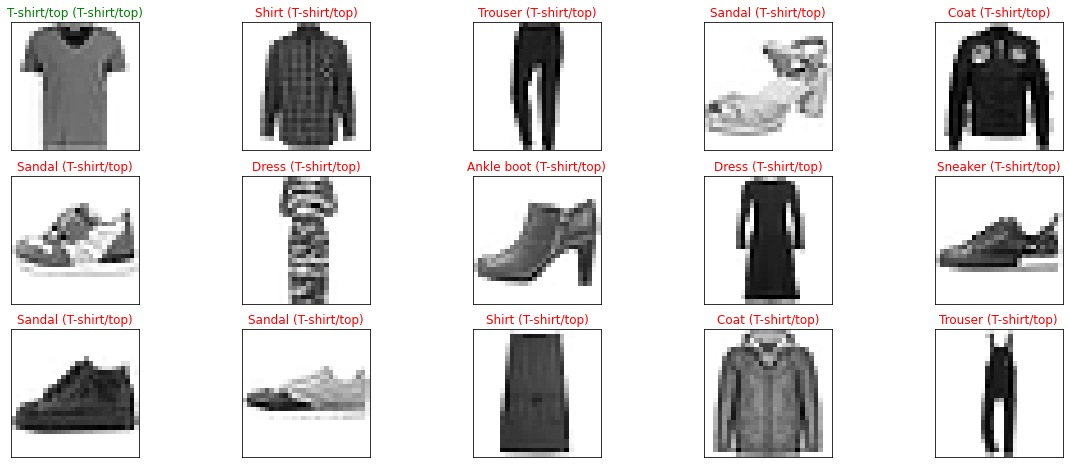

In [50]:
""""
    Takes random 25 images from test_images and prints with green title if the
    model predicted them right and with red title if model was wrong
"""
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    #Display each image
    ax.imshow(np.squeeze(test_images[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(model_1_predictions[index])
    true_index = np.argmax(test_labels[index])
    #Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                 color=("green" if predict_index == true_index else "red"))

# Model 2 : Change Activation function

A model with a different activation fucntion for output layer

In [51]:
#Change the activation fucntion for output layer and train for longer

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28, 28)),
                               tf.keras.layers.Dense(128, activation="ReLU"),
                               tf.keras.layers.Dense(10, activation="sigmoid")
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics= ['accuracy'])

history_2 = model_2.fit(train_images,
                        train_labels,
                        validation_split=0.20,
                        epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5193 - accuracy: 0.8190 - val_loss: 0.4038 - val_accuracy: 0.8568
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3901 - accuracy: 0.8595 - val_loss: 0.3851 - val_accuracy: 0.8605
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3476 - accuracy: 0.8739 - val_loss: 0.3739 - val_accuracy: 0.8673
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3221 - accuracy: 0.8825 - val_loss: 0.3411 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3059 - accuracy: 0.8882 - val_loss: 0.3530 - val_accuracy: 0.8716
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2874 - accuracy: 0.8939 - val_loss: 0.3637 - val_accuracy: 0.8731
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2738 - accuracy: 0.8984 - val_loss: 0.3450 - val_accuracy:

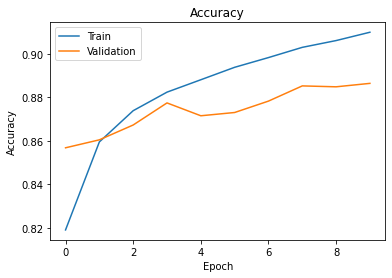

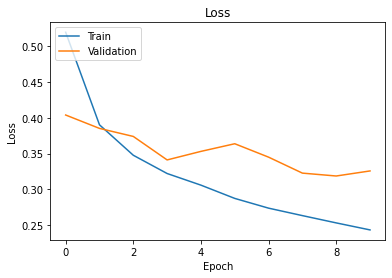

In [52]:
plot_accuracy_and_loss(history_2)

# Model 3 CNN

Now we are going to build models with convolutional neural networks.

CNNs are a special type of neural networks which use convolution and pooling layers. These types of neural networks work best with image datasets.

In [53]:
model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             strides=(1, 1),
                                                             padding='valid',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="ReLU"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(train_images,
                        train_labels,
                        validation_split=0.20,
                        epochs=5)

Epoch 1/5
1500/1500 [==============================] - 13s 3ms/step - loss: 0.4210 - accuracy: 0.8498 - val_loss: 0.3032 - val_accuracy: 0.8938
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.8924 - val_loss: 0.2874 - val_accuracy: 0.8974
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2495 - accuracy: 0.9083 - val_loss: 0.2651 - val_accuracy: 0.9043
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2189 - accuracy: 0.9185 - val_loss: 0.2517 - val_accuracy: 0.9087
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9284 - val_loss: 0.2320 - val_accuracy: 0.9151


# Model 4: Changing Padding

Now we will change the padding to same and we will also try reshaping our data by adding one dimension

In [54]:
model_4 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             strides=(1, 1),
                                                             padding='same',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="ReLU"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

x_train = np.expand_dims(train_images, -1)
x_test = np.expand_dims(test_images, -1)


history_4 = model_4.fit(x_train,
                        train_labels,
                        validation_split=0.20,
                        epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4045 - accuracy: 0.8540 - val_loss: 0.3022 - val_accuracy: 0.8888
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8967 - val_loss: 0.2791 - val_accuracy: 0.8991
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2399 - accuracy: 0.9114 - val_loss: 0.2496 - val_accuracy: 0.9087
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2075 - accuracy: 0.9230 - val_loss: 0.2441 - val_accuracy: 0.9123
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1856 - accuracy: 0.9307 - val_loss: 0.2555 - val_accuracy: 0.9083


In [55]:
train_images.shape, x_train.shape

((60000, 28, 28), (60000, 28, 28, 1))

In [56]:
model_3_predictions = model_3.predict(test_images)
model_3_predictions[120].argmax()

0

In [57]:
model_4_predictions = model_4.predict(x_test)
model_4_predictions[120].argmax()

0

In [58]:
model_3_predictions.shape, model_4_predictions.shape

((10000, 10), (10000, 10))

Hmmm.....didn't work out.

Now we will keep the padding same but reduce the learning rate and train for a little longer,

# Model 5: Tweaking Learning Rate

We will reduce the learning rate to 0.001, train for 5 epochs more and will also increase the number of neurons in dense layer to 512.

Also we will use a seperate validation dataset rather than splitting our training data by 20%, will give our model more data to train and validate

In [61]:
%%time
# Set the seed
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             strides=(1, 1),
                                                             padding='valid',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation="relu"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_5.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_5 = model_5.fit(train_images,
                        train_labels,
                        validation_data=(test_images, test_labels),
                        validation_steps=0.5*len(test_images),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3861 - accuracy: 0.8611 - val_loss: 0.3056 - val_accuracy: 0.8902
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2641 - accuracy: 0.9024 - val_loss: 0.2899 - val_accuracy: 0.8936
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2198 - accuracy: 0.9177 - val_loss: 0.2523 - val_accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 0.2462 - val_accuracy: 0.9124
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1584 - accuracy: 0.9394 - val_loss: 0.2494 - val_accuracy: 0.9170
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1366 - accuracy: 0.9493 - val_loss: 0.2761 - val_accuracy: 0.9077
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1154 - accuracy: 0.9560 - val_loss: 0.2622 - val_ac

# Model 6: CNN model

Same as model 3 but with seperate validation dataset but lesser validation steps than model 5.

In [63]:
%%time
model_6 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             padding='valid',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="ReLU"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_6.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_6 = model_6.fit(train_images,
                        train_labels,
                        validation_data=(test_images, test_labels),
                        validation_steps=0.1*len(test_images),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4102 - accuracy: 0.8531 - val_loss: 0.3217 - val_accuracy: 0.8849
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8970 - val_loss: 0.3109 - val_accuracy: 0.8887
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2448 - accuracy: 0.9102 - val_loss: 0.2645 - val_accuracy: 0.9026
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2132 - accuracy: 0.9216 - val_loss: 0.2575 - val_accuracy: 0.9078
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1924 - accuracy: 0.9270 - val_loss: 0.2494 - val_accuracy: 0.9083
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1720 - accuracy: 0.9360 - val_loss: 0.2519 - val_accuracy: 0.9083
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1541 - accuracy: 0.9423 - val_loss: 0.2558 - val_accuracy:

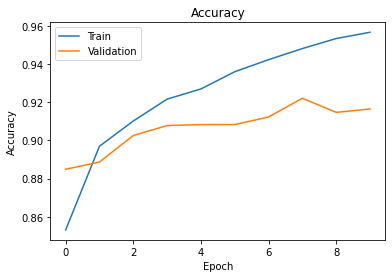

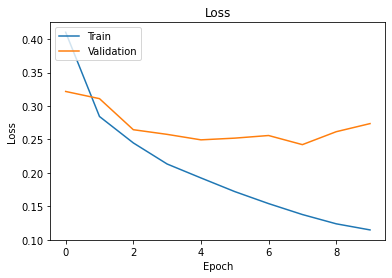

In [64]:
plot_accuracy_and_loss(history_6)

**This model's accuracy increased with every epoch so we can train it for a little longer but before that let's try a model with even lower learning rate.**

# Model 7: Reducing Learning Rate

Exactly same as model 3 but just reduced learning rate

In [65]:
%%time
# Set the seed
tf.random.set_seed(42)

model_7 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             strides=(1, 1),
                                                             padding='valid',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation="relu"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_7.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

history_7 = model_7.fit(train_images,
                        train_labels,
                        validation_data=(test_images, test_labels),
                        validation_steps=0.5*len(test_images),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5110 - accuracy: 0.8238 - val_loss: 0.3897 - val_accuracy: 0.8617
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3588 - accuracy: 0.8733 - val_loss: 0.3962 - val_accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3218 - accuracy: 0.8857 - val_loss: 0.3200 - val_accuracy: 0.8839
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2948 - accuracy: 0.8953 - val_loss: 0.3020 - val_accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2765 - accuracy: 0.9006 - val_loss: 0.2937 - val_accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2594 - accuracy: 0.9071 - val_loss: 0.2822 - val_accuracy: 0.8931
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2460 - accuracy: 0.9107 - val_loss: 0.2697 - val_ac

Hmmm....seems our model is stuck at somewhere around 91 accuracy and isn't improving.

Now with our last throw of the dice let's try training our model 6 for 10 epochs more as that model had the most linear accuracy slope.

# Model 8 : training for 20 epochs

Now we are going to traing our model 6 for 10 more epochs as it seemed to have an increasing accuracy with every epoch.

In [66]:
%%time
model_8 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=32,
                                                             kernel_size=(3, 3),
                                                             padding='valid',
                                                             activation='relu',
                                                             input_shape=(28, 28, 1)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2,), strides=(2, 2)),
                                      tf.keras.layers.Dropout(rate=0.25),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(128, activation="ReLU"),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_8.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_8 = model_8.fit(train_images,
                        train_labels,
                        validation_data=(test_images, test_labels),
                        validation_steps=0.1*len(test_images),
                        epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4059 - accuracy: 0.8555 - val_loss: 0.3177 - val_accuracy: 0.8863
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2799 - accuracy: 0.8982 - val_loss: 0.3261 - val_accuracy: 0.8828
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2417 - accuracy: 0.9112 - val_loss: 0.2625 - val_accuracy: 0.9018
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2102 - accuracy: 0.9226 - val_loss: 0.2415 - val_accuracy: 0.9110
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1870 - accuracy: 0.9304 - val_loss: 0.2517 - val_accuracy: 0.9093
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1668 - accuracy: 0.9373 - val_loss: 0.2590 - val_accuracy: 0.9100
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1495 - accuracy: 0.9438 - val_loss: 0.2470 - val_accuracy:

Wellll.....seems it's all in vain. This model did achieve 92% validation accuracy on two of its epochs but eventually ended with less than 92.

Let's evaluate all our models and see which one had the highest accuracy.

# Evaluating all our models

In [88]:
model_1_evaluation_results = model_1.evaluate(test_images, test_labels)
model_1_loss, model_1_accuracy = model_1_evaluation_results

model_1_loss, model_1_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8714


(0.3608885109424591, 0.871399998664856)

In [89]:
model_2_evaluation_results = model_2.evaluate(test_images, test_labels)
model_2_loss, model_2_accuracy = model_2_evaluation_results

model_2_loss, model_2_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8799


(0.35646724700927734, 0.8798999786376953)

In [69]:
model_3_evaluation_results = model_3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.9110


In [71]:
model_3_loss, model_3_accuracy = model_3_evaluation_results

In [74]:
model_4_evaluation_results = model_4.evaluate(test_images, test_labels)
model_4_loss, model_4_accuracy = model_4_evaluation_results

model_4_loss, model_4_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9007


(0.27470284700393677, 0.9006999731063843)

In [75]:
model_5_evaluation_results = model_5.evaluate(test_images, test_labels)
model_5_loss, model_5_accuracy = model_5_evaluation_results

model_5_loss, model_5_accuracy

313/313 [==============================] - 2s 5ms/step - loss: 0.2429 - accuracy: 0.9153


(0.24290737509727478, 0.9153000116348267)

In [76]:
model_6_evaluation_results = model_6.evaluate(test_images, test_labels)
model_6_loss, model_6_accuracy = model_6_evaluation_results

model_6_loss, model_6_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.9165


(0.2736433744430542, 0.9164999723434448)

In [77]:
model_7_evaluation_results = model_7.evaluate(test_images, test_labels)
model_7_loss, model_7_accuracy = model_7_evaluation_results

model_7_loss, model_7_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.9067


(0.25227299332618713, 0.9067000150680542)

In [78]:
model_8_evaluation_results = model_8.evaluate(test_images, test_labels)
model_8_loss, model_8_accuracy = model_8_evaluation_results

model_8_loss, model_8_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.9145


(0.3749869465827942, 0.9144999980926514)

In [80]:
import pandas as pd

In [90]:
Models_dict = {'Models': ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', "model_6", 'model_7', 'model_8'],
        'Accuracy': [model_1_accuracy, model_2_accuracy, model_3_accuracy, model_4_accuracy,
                     model_5_accuracy, model_6_accuracy, model_7_accuracy, model_8_accuracy],
        'Loss': [model_1_loss, model_2_loss, model_3_loss, model_4_loss,
                 model_5_loss, model_6_loss, model_7_loss, model_8_loss]} 
Models_Performance = pd.DataFrame.from_dict(Models_dict)

Models_Performance

,Models,Accuracy,Loss
0,model_1,0.8714,0.360889
1,model_2,0.8799,0.356467
2,model_3,0.9110,0.244686
3,model_4,0.9007,0.274703
4,model_5,0.9153,0.242907
5,model_6,0.9165,0.273643
6,model_7,0.9067,0.252273
7,model_8,0.9145,0.374987


So we can conclude that our model 6 performed the best on our validation dataset.

# Visualizing best model's performance

In [91]:
model_6_predictions = model_6.predict(test_images)

In [92]:
#Predictions on 10 random images in our model
a = random.randrange(0, 9000, 1)

for i in range(a, a+10):
    print("Predicted Label: ", model_6_predictions[i].argmax(), class_names[model_6_predictions[i].argmax()])
    print("True label.....: ", test_labels[i], class_names[test_labels[i]])
    print("-----------------")

Predicted Label:  4 Coat
True label.....:  4 Coat
-----------------
Predicted Label:  8 Bag
True label.....:  8 Bag
-----------------
Predicted Label:  7 Sneaker
True label.....:  7 Sneaker
-----------------
Predicted Label:  0 T-shirt/top
True label.....:  0 T-shirt/top
-----------------
Predicted Label:  3 Dress
True label.....:  3 Dress
-----------------
Predicted Label:  6 Shirt
True label.....:  6 Shirt
-----------------
Predicted Label:  4 Coat
True label.....:  4 Coat
-----------------
Predicted Label:  7 Sneaker
True label.....:  7 Sneaker
-----------------
Predicted Label:  3 Dress
True label.....:  3 Dress
-----------------
Predicted Label:  3 Dress
True label.....:  3 Dress
-----------------


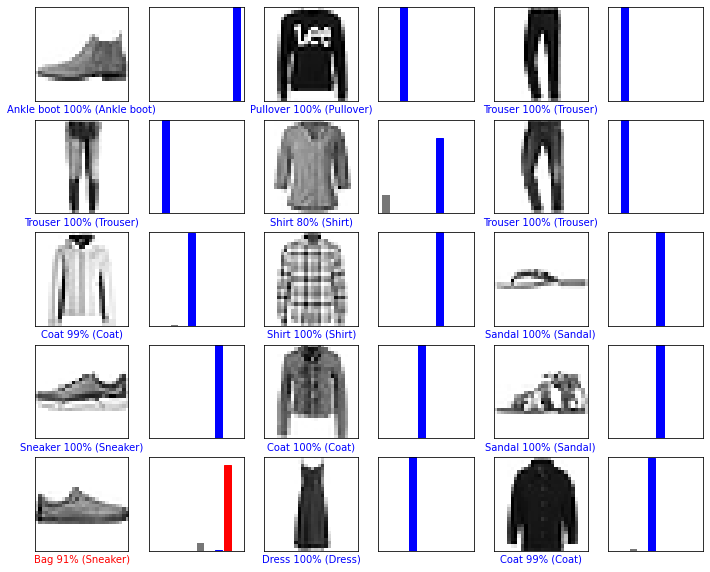

In [96]:
#Plots first 15 images

plot_multi_images_prob(model_6_predictions, test_labels, test_images, class_names=class_names, cmap=plt.cm.binary)